# Task 1
This is simple linear regression project.This project is based on two variable.In this regression roject we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

# Import Libraries

In [1]:
#importing all libraries that they involved in this project
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# load data set 
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Graph
using scatter plots, plot a graph of our data set and find a relationship or distribution of scores.

Text(0, 0.5, 'Percentage Score')

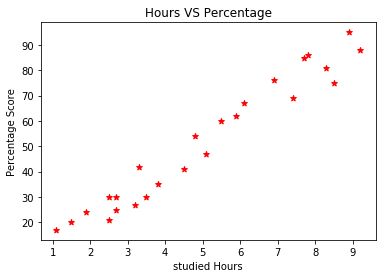

In [4]:
plt.figure(figsize=(20,10))
%matplotlib inline
plt.scatter(data.Hours , data.Scores , marker = '*' , color = 'r')
plt.title('Hours VS Percentage')
plt.xlabel('studied Hours')
plt.ylabel('Percentage Score')

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.
# Analysis & Prepration of Data

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.ndim

2

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data['Scores']= data['Scores'].apply(pd.to_numeric)
print(data['Scores'].dtype)

int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


change the data type of scores int to float

In [10]:
data = data.astype({"Hours": float, "Scores": float})
data.Scores.dtype

dtype('float64')

In [11]:
print(data.shape)
print(data.Hours.shape)
print(data.Scores.shape)

(25, 2)
(25,)
(25,)


In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Corelation between columns

In [13]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Train the model

In [14]:
x = data.drop("Scores" , axis = 'columns') # In x columns the values is Hours 
y = data.drop('Hours' , axis = 'columns')  # In y columns the values is scores

In [15]:
print("Shape of x is " , x.shape)
print("Shape of y is " , y.shape)

Shape of x is  (25, 1)
Shape of y is  (25, 1)


In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)
# test_size 0.2 means 20 percent

In [17]:
print("Shape of x_train is " , x_train.shape)
print("Shape of x_test is " , x_test.shape)
print("Shape of y_train is " , y_train.shape)
print("Shape of y_test is " , y_test.shape)

Shape of x_train is  (20, 1)
Shape of x_test is  (5, 1)
Shape of y_train is  (20, 1)
Shape of y_test is  (5, 1)


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
hour = 9.25
model.predict([[9.25]])[0][0].round(3)

93.692

In [20]:
model.coef_

array([[9.91065648]])

In [21]:
model.intercept_

array([2.01816004])

linear regression formula is Y = mx+c
so ,

m = coefficient

x = variable

c = intercepet

In [27]:
# Y = m*x+c
9.91065648*9.25+2.01816004

93.69173248

In [23]:
predicted_values = model.predict(x_test)
print(predicted_values)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [24]:
import numpy as np
predict = pd.DataFrame(np.c_[x_test , y_test , predicted_values], columns = ['Hours','Actual_Scores','Predicted_value'])
predict

,Hours,Actual_Scores,Predicted_value
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


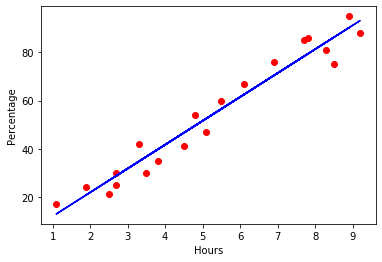

In [30]:
plt.scatter(x_train , y_train , color = 'r')
plt.plot(x_train,model.predict(x_train) , color = 'b')
plt.xlabel('Hours')
plt.ylabel("Percentage")
plt.show()

In [31]:
from sklearn import metrics
metrics.mean_absolute_error(y_test , predicted_values)

4.183859899002975